/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


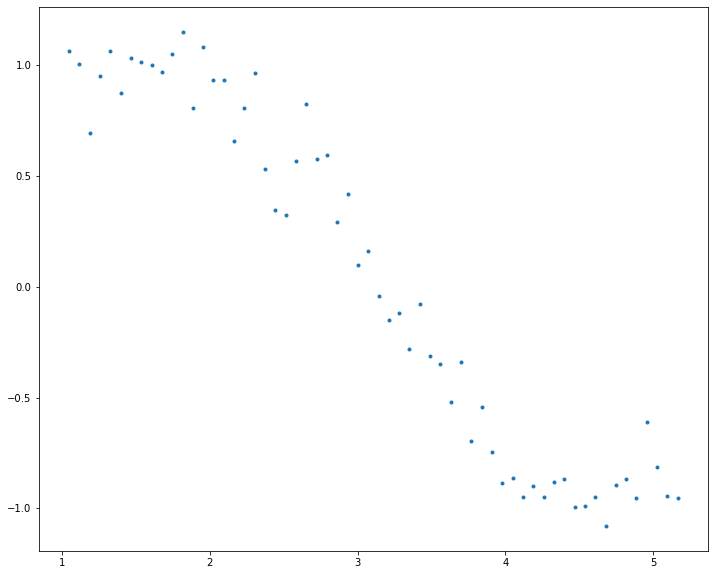

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as pl
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
pl.plot(data['x'],data['y'],'.')

In [2]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

In [4]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

def LASSO_regression(data, predictors, alpha, models_to_plot={}):
    
    #Train test split
    X_train, X_test, y_train, y_test = train_test_split(data[predictors], data['y'], 
                                                        test_size=0.2, random_state=42)
    
    #Fit the model
    reg = Lasso(alpha=alpha,normalize=True)
    reg.fit(X_train,y_train)
    y_pred_train = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        pl.subplot(models_to_plot[alpha])
        pl.tight_layout()
        pl.plot(X_train['x'],y_pred_train,'ro')
        pl.plot(data['x'],data['y'],'.')
        pl.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss_train = sum((y_pred_train-y_train)**2)/y_train.size
    rss_test  = sum((y_pred_test-y_test)**2)/y_test.size
    ret = [rss_train]
    ret.extend([rss_test])
    ret.extend([reg.intercept_])
    ret.extend(reg.coef_)
    return ret

/home/riccardo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4312354598460379, tolerance: 0.002784608479915756
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated an

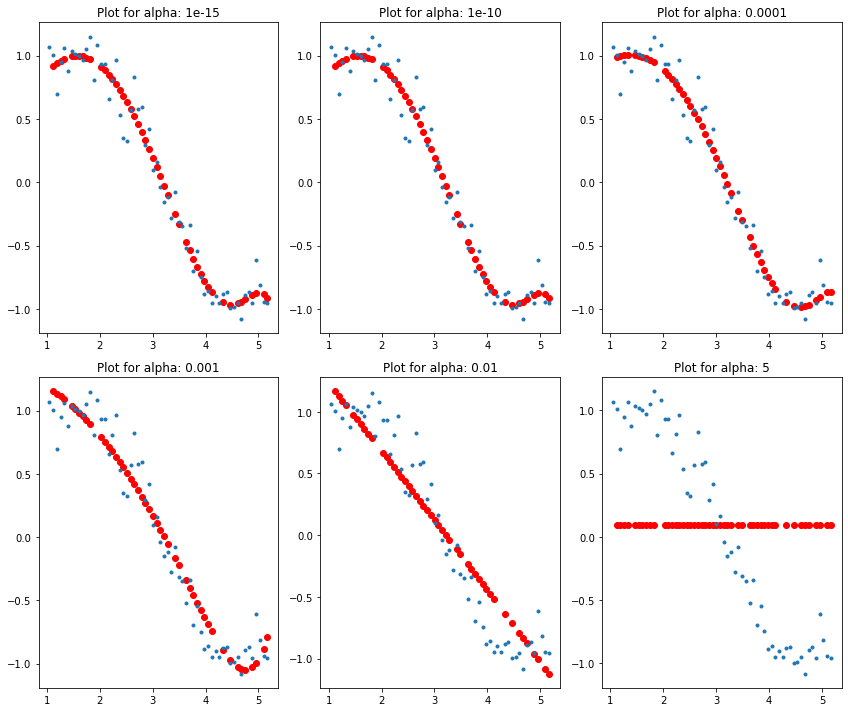

In [6]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss_train','rss_test','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_lasso.iloc[i,] = LASSO_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [8]:
coef_matrix_lasso

rss_train  rss_test intercept  coef_x_1  coef_x_2  coef_x_3  \
alpha_1e-15   0.017968  0.009589  0.043522   1.16793 -0.319834 -0.023964   
alpha_1e-10   0.017968  0.009589  0.043522   1.16793 -0.319834 -0.023964   
alpha_1e-08   0.017968  0.009588  0.043571  1.167878 -0.319821 -0.023964   
alpha_0.0001  0.018891  0.009176  0.492301  0.710628 -0.212753 -0.022732   
alpha_0.001   0.030343  0.018695   1.31372      -0.0 -0.127583      -0.0   
alpha_0.01    0.060854  0.052961  1.768792 -0.533296 -0.005095      -0.0   
alpha_1       0.580127  0.773579  0.092956      -0.0      -0.0      -0.0   
alpha_5       0.580127  0.773579  0.092956      -0.0      -0.0      -0.0   
alpha_10      0.580127  0.773579  0.092956      -0.0      -0.0      -0.0   
alpha_20      0.580127  0.773579  0.092956      -0.0      -0.0      -0.0   

              coef_x_4  coef_x_5  coef_x_6  coef_x_7  coef_x_8 coef_x_9  \
alpha_1e-15  -0.000442  0.000317   0.00009  0.000018  0.000003      0.0   
alpha_1e-10  -0.000442  0.000317   0.00009  0.000018  0.000003      0.0   
alpha_1e-08  -0.000442  0.000317   0.00009  0.000018  0.000003      0.0   
alpha_0.0001      -0.0      -0.0  0.000028  0.000023  0.000003      0.0   
alpha_0.001       -0.0      -0.0       0.0       0.0       0.0      0.0   
alpha_0.01        -0.0      -0.0      -0.0      -0.0      -0.0      0.0   
alpha_1           -0.0      -0.0      -0.0      -0.0      -0.0     -0.0   
alpha_5           -0.0      -0.0      -0.0      -0.0      -0.0     -0.0   
alpha_10          -0.0      -0.0      -0.0      -0.0      -0.0     -0.0   
alpha_20          -0.0      -0.0      -0.0      -0.0      -0.0     -0.0   

             coef_x_10 coef_x_11 coef_x_12 coef_x_13 coef_x_14 coef_x_15  
alpha_1e-15        0.0       0.0      -0.0      -0.0      -0.0      -0.0  
alpha_1e-10        0.0       0.0      -0.0      -0.0      -0.0      -0.0  
alpha_1e-08        0.0       0.0      -0.0      -0.0      -0.0      -0.0  
alpha_0.0001       0.0       0.0       0.0      -0.0      -0.0      -0.0  
alpha_0.001        0.0       0.0       0.0       0.0       0.0       0.0  
alpha_0.01         0.0       0.0       0.0       0.0       0.0       0.0  
alpha_1           -0.0      -0.0      -0.0      -0.0      -0.0      -0.0  
alpha_5           -0.0      -0.0      -0.0      -0.0      -0.0      -0.0  
alpha_10          -0.0      -0.0      -0.0      -0.0      -0.0      -0.0  
alpha_20          -0.0      -0.0      -0.0      -0.0      -0.0      -0.0

In [17]:
alpha = np.asarray(alpha_lasso)

pl.semilogx(1./alpha,coef_matrix_lasso['rss_train'])
pl.semilogx(1./alpha,coef_matrix_lasso['rss_test'])

In [26]:
#compute density 

output = coef_matrix_lasso.values

rho = []

for i in range(len(alpha)):
    
    tmp = np.count_nonzero(output[i,3:18])/15
    rho.append(tmp)

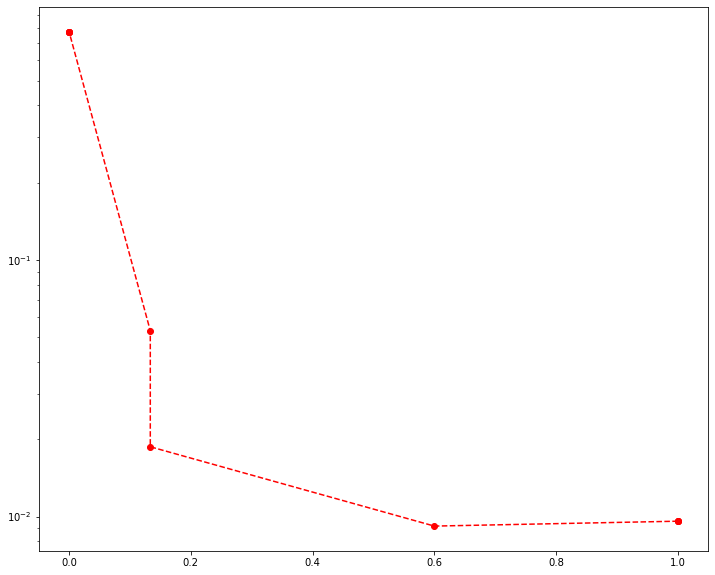

In [30]:
pl.semilogy(rho,coef_matrix_lasso['rss_test'],'r--o')